# Goal

* Use validation dataset to test the power of HR-SIP with multiple 'heavy' BD windows
  * global adjustment of all hypotheses for all windows
  * using 2-4 windows and assessing the power

# Setting variables

In [99]:
workDir = '/home/nick/notebook/SIPSim/dev/bac_genome1147/validation/multiWindow_HRSIP/'
genomeDir = '/var/seq_data/ncbi_db/genome/Jan2016/bac_complete_spec-rep1_rn/'
figureDir = '/home/nick/notebook/SIPSim/figures/bac_genome_n1147/'

# OTU_abs{abs}_PCR_sub.physeq

# Init

In [100]:
import glob
import nestly
import os
%load_ext rpy2.ipython
%load_ext pushnote

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The pushnote extension is already loaded. To reload it, use:
  %reload_ext pushnote


In [101]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)

In [102]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)
        
%cd $workDir    

/home/nick/notebook/SIPSim/dev/bac_genome1147/validation/multiWindow_HRSIP


# HR-SIP with multiple windows

In [103]:
def HRSIP_multi_window(physeq, BD_shift, BDs, outname, padj=0.1, log2=0.25):
    # HR-SIP for each window
    occurs = ','.join([str(x/100.0) for x in range(0,55,5)])
    outname2 = outname + '_DS2.txt'
    !SIPSimR phyloseq_DESeq2 --occur_all $occurs -w $BDs $physeq > $outname2
    # making confusion matrix
    !SIPSimR DESeq2_confuseMtx --padj $padj --log2 $log2 $BD_shift -o $outname $outname2

### 1.70-1.74,1.72-1.76

In [104]:
BDs = '1.70-1.74,1.72-1.76'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW1')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.74
 pre-filter: number of samples: 56
 post-filter: number of samples: 18
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1070
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 75 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.7-1.74
 pre-filter: number of samples: 56
 

### 1.70-1.75,1.72-1.77

In [105]:
BDs = '1.70-1.75,1.72-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW2')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.75
 pre-filter: number of samples: 56
 post-filter: number of samples: 24
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1076
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 82 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 21

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.7-1.75
 pre-filter: number of samples: 56


### 1.70-1.73,1.72-1.75,1.74-1.77

In [106]:
BDs = '1.70-1.73,1.72-1.75,1.74-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW3')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.73
 pre-filter: number of samples: 56
 post-filter: number of samples: 14
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1064
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.7-1.73
 pre-filter: number of samples: 56
 

### 1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75

In [107]:
BDs = '1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW4')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.72
 pre-filter: number of samples: 56
 post-filter: number of samples: 9
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1040
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.7-1.72
 pre-filter: number of samples: 56
 post-filter: number of samples: 9
# occurance cutoff: 0
 pre-filter: number of taxa: 1056
 post-filter: number of taxa: 1020
# DESeq2 run
converting counts to integer mode
using pre-existing size 

### 1.71-1.75

In [108]:
BDs = '1.71-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW5')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.75
 pre-filter: number of samples: 56
 post-filter: number of samples: 20
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1025
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 17 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 59

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.71-1.75
 pre-filter: number of samples: 5

### 1.71-1.8

In [109]:
BDs = '1.71-1.8'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW6')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.8
 pre-filter: number of samples: 56
 post-filter: number of samples: 32
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1053
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 69 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 88

# occurance cutoff: 0.05
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1056
# "heavy" BD window: 1.71-1.8
 pre-filter: number of samples: 56


# Plotting results

In [110]:
files = ['OTU_n2_abs1e9_PCR_subNorm_MW{}_byClass.txt'.format(i) for i in xrange(1,7)]
files

['OTU_n2_abs1e9_PCR_subNorm_MW1_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW2_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW3_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW4_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW5_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW6_byClass.txt']

In [111]:
%%R -i files

renames = data.frame(file = c('MW1', 'MW2', 'MW3', 'MW4', 'MW5', 'MW6'),
                     BD_window = c('1.70-1.74,\n1.72-1.76', 
                                   '1.70-1.75,\n1.72-1.77',
                                   '1.70-1.73,\n1.72-1.75,\n1.74-1.77',
                                   '1.70-1.72,\n1.71-1.73,\n1.72-1.74,\n1.73-1.75',
                                   '1.71-1.75', '1.71-1.8'))

df = list()
for(F in files){
    tmp = read.delim(F, sep='\t')
    df[[F]] = tmp
}
df = do.call(rbind, df)
df$file = gsub('.+(MW[0-9]+).+', '\\1', rownames(df))

df = inner_join(df, renames, c('file' = 'file')) 

df %>% head(n=3)

  library      variables    values file             BD_window
1       2    Sensitivity 0.8990826  MW1 1.70-1.74,\n1.72-1.76
2       2    Specificity 1.0000000  MW1 1.70-1.74,\n1.72-1.76
3       2 Pos Pred Value 1.0000000  MW1 1.70-1.74,\n1.72-1.76


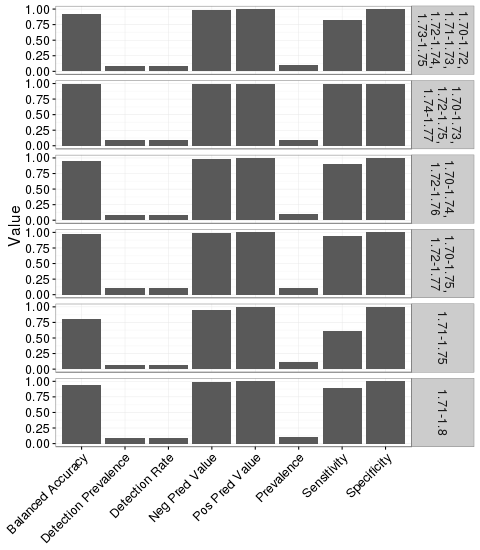

In [112]:
%%R -h 550
ggplot(df, aes(variables, values)) +
    geom_bar(stat='identity') +
    labs(y='Value') +
    facet_grid(BD_window ~ .) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

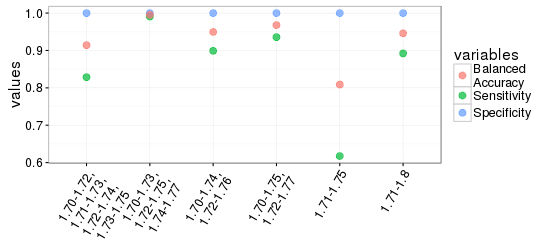

In [113]:
%%R -h 250 -w 550
df.f = df %>%
    filter(variables %in% c('Sensitivity', 'Specificity', 'Balanced Accuracy')) %>%
    mutate(variables = gsub(' ', '\n', variables))

ggplot(df.f, aes(BD_window, values, color=variables)) +
    geom_point(size=3, alpha=0.7) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=60, hjust=1)
    )

In [114]:
%pushnote validation MW-HR-SIP complete

***

# HR-SIP with multiple windows (post-occur)

In [115]:
def HRSIP_multi_window_post(physeq, BD_shift, BDs, outname, padj=0.1, log2=0.25):
    # HR-SIP for each window
    occurs = ','.join([str(x/100.0) for x in range(0,55,5)])
    outname2 = outname + '_DS2.txt'
    !SIPSimR phyloseq_DESeq2 --occur_heavy $occurs -w $BDs $physeq > $outname2
    # making confusion matrix
    !SIPSimR DESeq2_confuseMtx --padj $padj --log2 $log2 $BD_shift -o $outname $outname2

### 1.70-1.74,1.72-1.76

In [116]:
BDs = '1.70-1.74,1.72-1.76'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW1p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.74
 pre-filter: number of samples: 56
 post-filter: number of samples: 18
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1070
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 75 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.72-1.76
 pre-filter: number of samples: 56
 po

### 1.70-1.75,1.72-1.77

In [117]:
BDs = '1.70-1.75,1.72-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW2p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.75
 pre-filter: number of samples: 56
 post-filter: number of samples: 24
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1076
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 82 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 21

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.72-1.77
 pre-filter: number of samples: 56
 p

### 1.70-1.73,1.72-1.75,1.74-1.77

In [118]:
BDs = '1.70-1.73,1.72-1.75,1.74-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW3p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.73
 pre-filter: number of samples: 56
 post-filter: number of samples: 14
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1064
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.72-1.75
 pre-filter: number of samples: 56
 po

### 1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75

In [119]:
BDs = '1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW4p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.7-1.72
 pre-filter: number of samples: 56
 post-filter: number of samples: 9
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1040
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
# Number of rejected hypotheses: 0

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.73
 pre-filter: number of samples: 56
 post-filter: number of samples: 10
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 979
# DESeq2 run
converting counts to integer mode
using pre-existing size fa

### 1.71-1.75

In [120]:
BDs = '1.71-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW5p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.75
 pre-filter: number of samples: 56
 post-filter: number of samples: 20
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1025
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 17 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 59

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.75
 pre-filter: number of samples: 56
 

### 1.71-1.8

In [121]:
BDs = '1.71-1.8'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window_post(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW6p')

Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.8
 pre-filter: number of samples: 56
 post-filter: number of samples: 32
# occurance cutoff: 0
 pre-filter: number of taxa: 1090
 post-filter: number of taxa: 1053
# DESeq2 run
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 69 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
# Number of rejected hypotheses: 88

# occurance cutoff: 0
 pre-filter: number of taxa: 1147
 post-filter: number of taxa: 1090
# "heavy" BD window: 1.71-1.8
 pre-filter: number of samples: 56
 po

# Plotting results

In [130]:
files = ['OTU_n2_abs1e9_PCR_subNorm_MW{}p_byClass.txt'.format(i) for i in xrange(1,7)]
files

['OTU_n2_abs1e9_PCR_subNorm_MW1p_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW2p_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW3p_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW4p_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW5p_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW6p_byClass.txt']

In [131]:
%%R -i files

renames = data.frame(file = c('MW1', 'MW2', 'MW3', 'MW4', 'MW5', 'MW6'),
                     BD_window = c('1.70-1.74,\n1.72-1.76', 
                                   '1.70-1.75,\n1.72-1.77',
                                   '1.70-1.73,\n1.72-1.75,\n1.74-1.77',
                                   '1.70-1.72,\n1.71-1.73,\n1.72-1.74,\n1.73-1.75',
                                   '1.71-1.75', '1.71-1.8'))

df = list()
for(F in files){
    tmp = read.delim(F, sep='\t')
    df[[F]] = tmp
}
df = do.call(rbind, df)
df$file = gsub('.+(MW[0-9]+).+', '\\1', rownames(df))

df = inner_join(df, renames, c('file' = 'file')) 

df %>% head(n=3)

  library      variables    values file             BD_window
1       2    Sensitivity 0.9082569  MW1 1.70-1.74,\n1.72-1.76
2       2    Specificity 1.0000000  MW1 1.70-1.74,\n1.72-1.76
3       2 Pos Pred Value 1.0000000  MW1 1.70-1.74,\n1.72-1.76


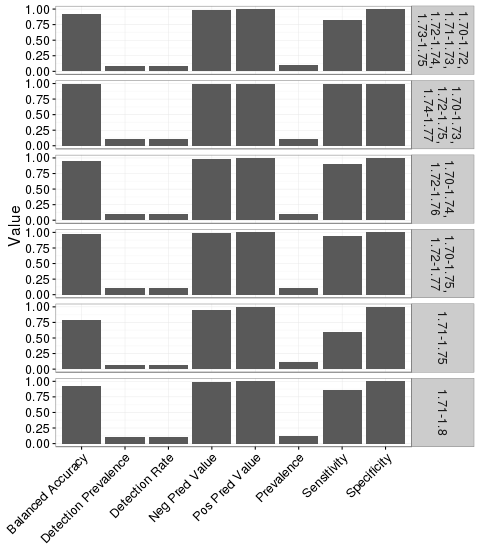

In [134]:
%%R -h 550
ggplot(df, aes(variables, values)) +
    geom_bar(stat='identity') +
    labs(y='Value') +
    facet_grid(BD_window ~ .) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

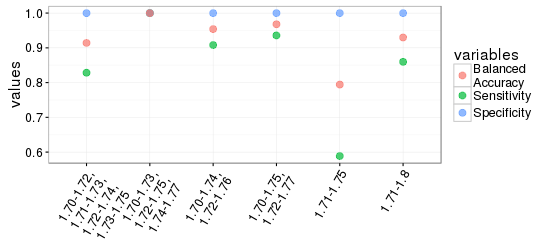

In [132]:
%%R -h 250 -w 550
df.f = df %>%
    filter(variables %in% c('Sensitivity', 'Specificity', 'Balanced Accuracy')) %>%
    mutate(variables = gsub(' ', '\n', variables))

ggplot(df.f, aes(BD_window, values, color=variables)) +
    geom_point(size=3, alpha=0.7) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=60, hjust=1)
    )

In [133]:
%pushnote validation MW-HR-SIP complete